# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [4]:
sinasc_raw['munResNome'].value_counts()

Porto Velho                  8437
Ji-Paraná                    2182
Ariquemes                    1729
Vilhena                      1590
Cacoal                       1374
Rolim de Moura                927
Jaru                          881
Guajará-Mirim                 781
Ouro Preto do Oeste           631
Pimenta Bueno                 616
Buritis                       583
Machadinho D'Oeste            500
Espigão D'Oeste               450
Nova Mamoré                   432
Alta Floresta D'Oeste         367
São Miguel do Guaporé         353
Candeias do Jamari            337
Presidente Médici             304
São Francisco do Guaporé      303
Nova Brasilândia D'Oeste      261
Cerejeiras                    237
Costa Marques                 233
Alto Paraíso                  226
Colorado do Oeste             214
Alvorada D'Oeste              205
Cujubim                       205
Monte Negro                   199
Urupá                         170
Seringueiras                  168
Campo Novo de 

In [5]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
sinasc_raw['munResLat'].min()

-13.49976

In [7]:
sinasc_raw['munResLat'].max()

-8.76889

In [8]:
intervalos = pd.cut(sinasc_raw['munResLat'], [-13.5, -10.5, -8.7])
agrupamento = sinasc_raw.groupby(intervalos)[['SEMAGESTAC', 'CONSPRENAT']]
agrupamento.aggregate([
    ('soma', 'sum'), 
    ('média', 'mean'), 
    ('mínimo', 'min'), 
    ('máximo', 'max'), 
    ('mediana', 'median'), 
    ('desvio', 'std'), 
    ('variância', 'var')
])

SEMAGESTAC                                             \
                     soma      média mínimo máximo mediana    desvio   
munResLat                                                              
(-13.5, -10.5]   482665.0  38.545360   19.0   45.0    39.0  2.012435   
(-10.5, -8.7]    511951.0  38.588302   21.0   45.0    39.0  2.020722   

                         CONSPRENAT                                            \
               variância       soma     média mínimo máximo mediana    desvio   
munResLat                                                                       
(-13.5, -10.5]  4.049895   110072.0  8.591321    0.0   99.0     8.0  4.243102   
(-10.5, -8.7]   4.083319   105365.0  7.931125    0.0   99.0     8.0  5.863665   

                           
                variância  
munResLat                  
(-13.5, -10.5]  18.003915  
(-10.5, -8.7]   34.382564

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [9]:
sinasc_raw['munResArea'].min()

459.978

In [10]:
sinasc_raw['munResArea'].max()

34096.394

In [11]:
faixas_area = pd.cut(sinasc_raw['munResArea'], [459, 3000, 34100])
aggr_area = sinasc_raw.groupby(faixas_area)[['APGAR1', 'APGAR5']]
aggr_area.aggregate([
    ('soma', 'sum'), 
    ('média', 'mean'), 
    ('mínimo', 'min'), 
    ('máximo', 'max'), 
    ('mediana', 'median'), 
    ('desvio', 'std'), 
    ('variância', 'var')
])

APGAR1                                                      \
                   soma     média mínimo máximo mediana    desvio variância   
munResArea                                                                    
(459, 3000]     42070.0  8.073306    0.0   10.0     8.0  1.008790  1.017658   
(3000, 34100]  177079.0  8.152808    0.0   10.0     8.0  0.978517  0.957495   

                 APGAR5                                                      
                   soma     média mínimo máximo mediana    desvio variância  
munResArea                                                                   
(459, 3000]     47560.0  9.130351    0.0   10.0     9.0  0.801124  0.641799  
(3000, 34100]  199579.0  9.190836    0.0   10.0     9.0  0.787591  0.620299

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [12]:
sinasc_raw['munResAlt'].min()

85.0

In [13]:
sinasc_raw['munResAlt'].max()

595.0

In [14]:
faixas_alt = pd.qcut(sinasc_raw['munResAlt'], 5)
aggr_alt = sinasc_raw.groupby(faixas_alt)[['QTDFILVIVO', 'QTDFILMORT']]
aggr_alt.aggregate([
    ('soma', 'sum'), 
    ('média', 'mean'), 
    ('mínimo', 'min'), 
    ('máximo', 'max'), 
    ('mediana', 'median'), 
    ('desvio', 'std'), 
    ('variância', 'var')
])

QTDFILVIVO                                                      \
                     soma     média mínimo máximo mediana    desvio variância   
munResAlt                                                                       
(84.999, 87.0]     8976.0  1.177798    0.0   12.0     1.0  1.236798  1.529670   
(87.0, 139.0]      3556.0  1.161332    0.0   11.0     1.0  1.312407  1.722412   
(139.0, 161.0]     4331.0  1.052491    0.0   14.0     1.0  1.176940  1.385188   
(161.0, 227.0]     5353.0  0.908366    0.0    9.0     1.0  1.005460  1.010950   
(227.0, 595.0]     4610.0  0.967877    0.0   30.0     1.0  1.122494  1.259993   

               QTDFILMORT                                                      
                     soma     média mínimo máximo mediana    desvio variância  
munResAlt                                                                      
(84.999, 87.0]     2282.0  0.309550    0.0    9.0     0.0  0.642375  0.412645  
(87.0, 139.0]       804.0  0.263953    0.0    7.0     0.0  0.600433  0.360520  
(139.0, 161.0]     1020.0  0.261673    0.0    9.0     0.0  0.600037  0.360045  
(161.0, 227.0]     1413.0  0.241044    0.0    5.0     0.0  0.545241  0.297288  
(227.0, 595.0]     1124.0  0.236582    0.0   28.0     0.0  0.663021  0.439596

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [15]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [16]:
sinasc_raw['munResRegiao'] = sinasc_raw['munResNome'].map(imediatas)
sinasc_raw.dropna(subset=['munResRegiao'], inplace=True)

In [17]:
regioes = sinasc_raw['munResRegiao'].unique()
regioes

array(['Cacoal', 'Ariquemes', 'Jaru', 'Porto Velho', 'Ji-Paraná',
       'Vilhena'], dtype=object)

In [18]:
agr_imediatas = sinasc_raw.groupby(['munResRegiao', 'DTNASC'])
serie_agrupada = agr_imediatas['IDADEMAE'].mean()
serie_agrupada

munResRegiao  DTNASC    
Ariquemes     2019-01-01    23.200000
              2019-01-02    26.166667
              2019-01-03    24.142857
              2019-01-04    24.666667
              2019-01-05    22.888889
                              ...    
Vilhena       2019-12-27    27.000000
              2019-12-28    22.666667
              2019-12-29    24.250000
              2019-12-30    26.600000
              2019-12-31    23.857143
Name: IDADEMAE, Length: 2181, dtype: float64

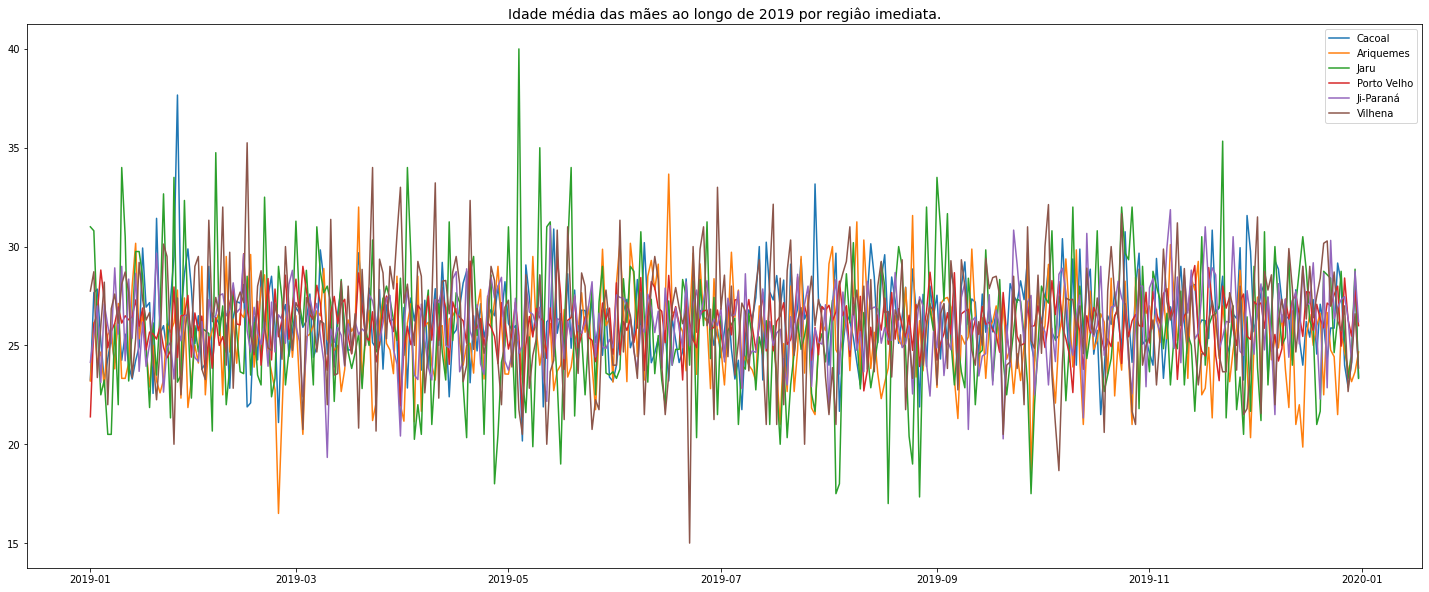

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
ax.set_title('Idade média das mães ao longo de 2019 por regiâo imediata.', fontsize=14)
for reg in regioes:
    ax.plot(serie_agrupada[reg].index, serie_agrupada[reg], label=reg)
ax.legend()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [20]:
class_idh = {
    'Porto Velho': 'alto',
    'Vilhena': 'alto',
    'Cacoal': 'alto',
    'Ji-Paraná': 'alto',
    'Pimenta Bueno': 'alto',
    'Ariquemes': 'alto',
    'Rolim de Moura': 'alto',

    'Cerejeiras': 'médio',
    'Jaru': 'médio',
    'Colorado do Oeste': 'médio',
    'Ouro Preto do Oeste': 'médio',
    "Espigão D'Oeste": 'médio',
    "Santa Luzia D'Oeste": 'médio',
    'Pimenteiras do Oeste': 'médio',
    'Presidente Médici': 'médio',
    'Castanheiras': 'médio',
    'Guajará-Mirim': 'médio',
    'Chupinguaia': 'médio',
    'Cabixi': 'médio',
    'Candeias do Jamari': 'médio',
    "São Felipe D'Oeste": 'médio',
    'Cacaulândia': 'médio',
    'São Miguel do Guaporé': 'médio',
    'Mirante da Serra': 'médio',
    "Alvorada D'Oeste": 'médio',
    'Teixeirópolis': 'médio',
    "Nova Brasilândia D'Oeste": 'médio',
    'Rio Crespo': 'médio',
    'Primavera de Rondônia': 'médio',
    "Alta Floresta D'Oeste": 'médio',
    "Ministro Andreazza": 'médio',
    "Novo Horizonte do Oeste": 'médio',
    "Vale do Paraíso": 'médio',
    "Alto Paraíso": 'médio',
    "Parecis": 'médio',
    "Buritis": 'médio',
    "Itapuã do Oeste": 'médio',
    "Corumbiara": 'médio',
    "Cujubim": 'médio',
    "Costa Marques": 'médio',
    "São Francisco do Guaporé": 'médio',
    "Urupá": 'médio',
    "Monte Negro": 'médio',
    
    "Seringueiras": 'baixo',
    "Governador Jorge Teixeira": 'baixo',
    "Machadinho D'Oeste": 'baixo',
    "Campo novo de Rondônia": 'baixo',
    "Alto Alegre dos Parecis": 'baixo',
    "Theobroma": 'baixo',
    "Nova União": 'baixo',
    "Nova Mamoré": 'baixo',
    "Vale do Anari": 'baixo'
}

In [21]:
sinasc_mun = sinasc_raw.set_index('munResNome')
agr_idh = sinasc_mun.groupby(class_idh)
agr_idh['IDADEMAE'].mean()

munResNome
alto     26.280332
baixo    25.377108
médio    25.884855
Name: IDADEMAE, dtype: float64

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [22]:
class_ifdm = {
    "Ariquemes": "moderado",
    "Vilhena": "moderado",
    "Pimenta Bueno": "moderado",
    "Porto Velho": "moderado",
    "Ji-Paraná": "moderado",
    "Cacoal": "moderado",
    "Santa Luzia D'Oeste": "moderado",
    "Rolim de Moura": "moderado",
    "Chupinguaia": "moderado",
    "São Miguel do Guaporé": "moderado",
    "Pimenteiras do Oeste": "moderado",
    "Teixeirópolis": "moderado",
    "Colorado do Oeste": "moderado",
    "Jaru": "moderado",
    "Rio Crespo": "moderado",
    "Primavera de Rondônia": "moderado",
    "Alta Floresta D'Oeste": "moderado",
    "Ouro Preto do Oeste": "moderado",
    "São Francisco do Guaporé": "moderado",
    "Candeias do Jamari": "moderado",
    "Buritis": "moderado",
    "São Felipe D'Oeste": "moderado",
    "Presidente Médici": "moderado",
    "Cerejeiras": "moderado",
    "Monte Negro": "moderado",
    "Urupá": "moderado",
    
    "Espigão D'Oeste": "regular",
    "Seringueiras": "regular",
    "Alvorada D'Oeste": "regular",
    "Itapuã do Oeste": "regular",
    "Cabixi": "regular",
    "Novo Horizonte do Oeste": "regular",
    "Nova Brasilândia do Oeste": "regular",
    "Vale do Paraíso": "regular",
    "Corumbiara": "regular",
    "Alto Paraíso": "regular",
    "Cacaulândia": "regular",
    "Vale do Anari": "regular",
    "Ministro Andreazza": "regular",
    "Costa Marques": "regular",
    "Nova União": "regular",
    "Guajará-Mirim": "regular",
    "Mirante da Serra": "regular",
    "Parecis": "regular",
    "Castanheiras": "regular",
    "Theobroma": "regular",
    "Machadinho D'Oeste": "regular",
    "Campo Novo de Rondônia": "regular",
    "Nova Mamoré": "regular",
    "Cujubim": "regular",
    "Alto Alegre dos Parecis": "regular",
    "Governador Jorge Teixeira": "regular",
}

In [23]:
agr_ifdm = sinasc_mun.groupby(class_ifdm)
agr_ifdm['IDADEMAE'].mean()

munResNome
moderado    26.223139
regular     25.497925
Name: IDADEMAE, dtype: float64

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [24]:
class_pib = {
    "Porto Velho": "Acima de R$ 1 Bilhão",
    "Ji-Paraná": "Acima de R$ 1 Bilhão",
    "Vilhena": "Acima de R$ 1 Bilhão",
    "Ariquemes": "Acima de R$ 1 Bilhão",
    "Cacoal": "Acima de R$ 1 Bilhão",
    "Jaru": "Acima de R$ 1 Bilhão",
    "Rolim de Moura": "Acima de R$ 1 Bilhão",
    "Pimenta Bueno": "Acima de R$ 1 Bilhão",

    "Guajará-Mirim": "Acima de R$ 500 Milhões",
    "Ouro Preto do Oeste": "Acima de R$ 500 Milhões",
    "Buritis": "Acima de R$ 500 Milhões",
    "Machadinho D'Oeste": "Acima de R$ 500 Milhões",
    "Espigão D'Oeste": "Acima de R$ 500 Milhões",
    "São Miguel do Guaporé": "Acima de R$ 500 Milhões",
    "Candeias do Jamari": "Acima de R$ 500 Milhões",
    "Nova Mamoré": "Acima de R$ 500 Milhões",
    "Cerejeiras": "Acima de R$ 500 Milhões",

    "Alta Floresta D'Oeste": "Acima de R$ 300 Milhões",
    "Presidente Médici": "Acima de R$ 300 Milhões",
    "Cujubim": "Acima de R$ 300 Milhões",
    "Nova Brasilândia D'Oeste": "Acima de R$ 300 Milhões",
    "Alto Paraíso": "Acima de R$ 300 Milhões",
    "São Francisco do Guaporé": "Acima de R$ 300 Milhões",
    "Colorado do Oeste": "Acima de R$ 300 Milhões",

    "Monte Negro": "Acima de R$ 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de R$ 200 Milhões",
    "Campo Novo de Rondônia": "Acima de R$ 200 Milhões",
    "Alvorada D'Oeste": "Acima de R$ 200 Milhões",

    "Chupinguaia": "Acima de R$ 100 Milhões",
    "Corumbiara": "Acima de R$ 100 Milhões",
    "Ministro Andreazza": "Acima de R$ 100 Milhões",
    "Urupá": "Acima de R$ 100 Milhões",
    "Costa Marques": "Acima de R$ 100 Milhões",
    "Seringueiras": "Acima de R$ 100 Milhões",
    "Mirante da Serra": "Acima de R$ 100 Milhões",
    "Governador Jorge Teixeira": "Acima de R$ 100 Milhões",
    "Theobroma": "Acima de R$ 100 Milhões",
    "Santa Luzia D'Oeste": "Acima de R$ 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de R$ 100 Milhões",
    "Itapuã do Oeste": "Acima de R$ 100 Milhões",
    "Vale do Paraíso": "Acima de R$ 100 Milhões",
    "Cacaulândia": "Acima de R$ 100 Milhões",
    "Cabixi": "Acima de R$ 100 Milhões",
    "Vale do Anari": "Acima de R$ 100 Milhões",

    "Nova União": "Até R$ 100 Milhões",
    "Parecis": "Até R$ 100 Milhões",
    "Rio Crespo": "Até R$ 100 Milhões",
    "Pimenteiras do Oeste": "Até R$ 100 Milhões",
    "Teixeirópolis": "Até R$ 100 Milhões",
    "São Felipe D'Oeste": "Até R$ 100 Milhões",
    "Castanheiras": "Até R$ 100 Milhões",
    "Primavera de Rondônia": "Até R$ 100 Milhões",
}

In [25]:
agr_pib = sinasc_mun.groupby(class_pib)
agr_pib['IDADEMAE'].mean()

munResNome
Acima de R$ 1 Bilhão       26.265562
Acima de R$ 100 Milhões    25.662910
Acima de R$ 200 Milhões    25.323204
Acima de R$ 300 Milhões    25.833511
Acima de R$ 500 Milhões    25.782528
Até R$ 100 Milhões         26.515081
Name: IDADEMAE, dtype: float64

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

#### 1. Em municípos mais desenvolvidos, as mães tendem a ter filhos ligeiramente mais tarde, em média.

<BarContainer object of 3 artists>

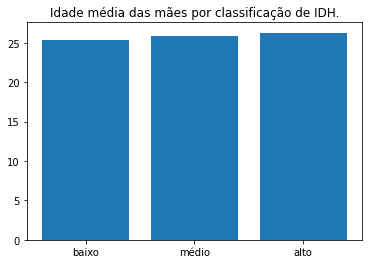

In [34]:
idade_mae_idh = agr_idh['IDADEMAE'].mean().sort_values()
fig, ax = plt.subplots()
ax.set_title('Idade média das mães por classificação de IDH.', fontsize=12)
ax.bar(idade_mae_idh.index, idade_mae_idh)

<BarContainer object of 2 artists>

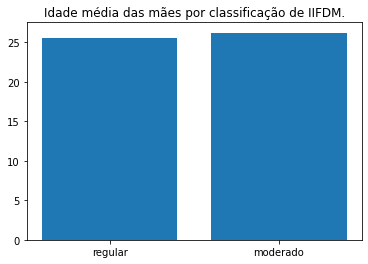

In [32]:
idade_mae_ifdm = agr_ifdm['IDADEMAE'].mean().sort_values()
fig, ax = plt.subplots()
ax.set_title('Idade média das mães por classificação de IIFDM.', fontsize=12)
ax.bar(idade_mae_ifdm.index, idade_mae_ifdm)

#### 2. Não há relação significativa entre o desenvolvimento de um município e o Índice Apgar 5.

<BarContainer object of 3 artists>

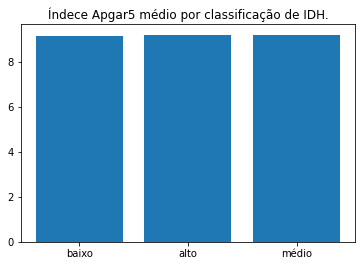

In [36]:
apgar5_idh = agr_idh['APGAR5'].mean().sort_values()
fig, ax = plt.subplots()
ax.set_title('Índece Apgar5 médio por classificação de IDH.', fontsize=12)
ax.bar(apgar5_idh.index, apgar5_idh)

<BarContainer object of 2 artists>

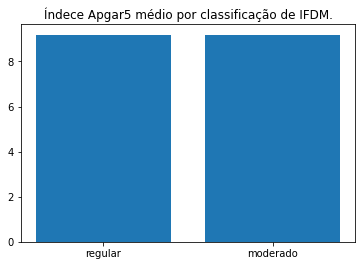

In [37]:
apgar5_ifdm = agr_ifdm['APGAR5'].mean().sort_values()
fig, ax = plt.subplots()
ax.set_title('Índece Apgar5 médio por classificação de IFDM.', fontsize=12)
ax.bar(apgar5_ifdm.index, apgar5_ifdm)